In [1]:
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:
x0 = pd.read_csv("linear_vectorfield_data_x0.txt", sep = " ", header = None).to_numpy()
x1 = pd.read_csv("linear_vectorfield_data_x1.txt", sep = " ", header = None).to_numpy()

# Part 1: Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

In [3]:
# Apply finite-difference formula
v = (x1-x0)/0.1

# Estimate the vector field A with least-squares minimization
A, _, _, _ = LSM(x0, v)

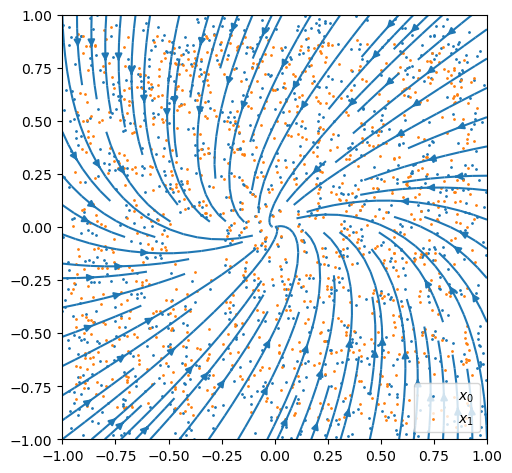

In [4]:
# Plot the vector field A within the domain of the dataset
w=1
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
ax = phase_portrait(A, X, Y)

# Plot the dataset
ax.scatter(x0[:, 0], x0[:, 1], s = 1, label = r'$x_0$')
ax.scatter(x1[:, 0], x1[:, 1], s = 1, label = r'$x_1$')
plt.legend()
plt.show()

# Part 2: Solve the linear system and compute the mean squared error

In [5]:
# Solve dx/dt = Ax with X as initial points up to a time 0.1
x1_pred = []
t = 0.1
for i in range(len(x0)):
    y = predict_x1(x0[i], t, A)
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
mse = (np.linalg.norm(x1 - x1_pred) ** 2) / len(x0)
print('MSE =', mse)

MSE = 0.003059927595989734


# Part 3: Visualize the trajectory as well as the phase portrait

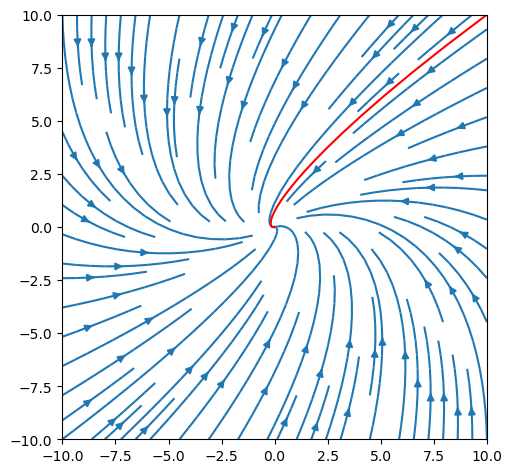

In [6]:
# Plot phase portrait in the domain [−10, 10]^2 and
# visualize the trajectory for a point x_0 = (10, 10)for T_end = 100
w = 10
y0 = np.array([10, 10])
time = np.linspace(0, 100, 500)
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

# Euler's method to construct and plot a trajectory over the stream plot
yt, time = solve_euler(lambda y: A@y, y0, time)

# linear vector field A*x
ax = phase_portrait(A, X, Y)
ax.set_xlim(-w, w)
ax.set_ylim(-w, w)

# then plot the trajectory over it
ax.plot(yt[:, 0], yt[:, 1], c='red')

# prettify
ax.set_aspect(1)